# Telecom churn case study:

# Problem statement:

In [1]:
# importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

warnings.filterwarnings("ignore")

# Load the data:

In [28]:
df = pd.read_csv("C://Users//DELL//Downloads//INSAID//Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the data:

In [29]:
print("This dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

This dataframe has 7043 rows and 21 columns


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [31]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.00,7043,7043,7043.00,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.00,7043,7043
unique,7043,2,nan,2,2,nan,2,3,3,3,...,3,3,3,3,3,2,4,nan,6531,2
top,8100-PNJMH,Male,nan,No,No,nan,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,nan,20.2,No
freq,1,3555,nan,3641,4933,nan,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,nan,11,5174
mean,NaN,NaN,0.16,NaN,NaN,32.37,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.76,NaN,NaN
std,NaN,NaN,0.37,NaN,NaN,24.56,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.09,NaN,NaN
min,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.25,NaN,NaN
25%,NaN,NaN,0.00,NaN,NaN,9.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.50,NaN,NaN
50%,NaN,NaN,0.00,NaN,NaN,29.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.35,NaN,NaN
75%,NaN,NaN,0.00,NaN,NaN,55.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.85,NaN,NaN


# Data manipulation:

# Converting datatypes


In [32]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors="coerce")
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# checking for missing values:

In [33]:
# Function to calculate missing values by column
pd.options.display.float_format = '{:.2f}'.format
def missing_values_table(df):
        "Function which will return null values percentage by column"
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [34]:
missing_values_table(df)

Your selected dataframe has 21 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
TotalCharges,11,0.20


In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
print(list(df.columns))
print("-"*40)
print(df.shape)

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
----------------------------------------
(7032, 21)


In [38]:
round(df[['tenure','MonthlyCharges','TotalCharges']].describe(),1)

,tenure,MonthlyCharges,TotalCharges
count,7032.00,7032.00,7032.00
mean,32.40,64.80,2283.30
std,24.50,30.10,2266.80
min,1.00,18.20,18.80
25%,9.00,35.60,401.40
50%,29.00,70.40,1397.50
75%,55.00,89.90,3794.70
max,72.00,118.80,8684.80


# EDA & Data Cleaning:

In [39]:
cols = df.columns
num_cols = df._get_numeric_data().columns
print (num_cols)
cat_cols=list(set(cols) - set(num_cols))
print(cat_cols)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
['Dependents', 'gender', 'customerID', 'PhoneService', 'PaperlessBilling', 'StreamingTV', 'InternetService', 'Partner', 'TechSupport', 'Churn', 'OnlineBackup', 'PaymentMethod', 'StreamingMovies', 'DeviceProtection', 'MultipleLines', 'Contract', 'OnlineSecurity']


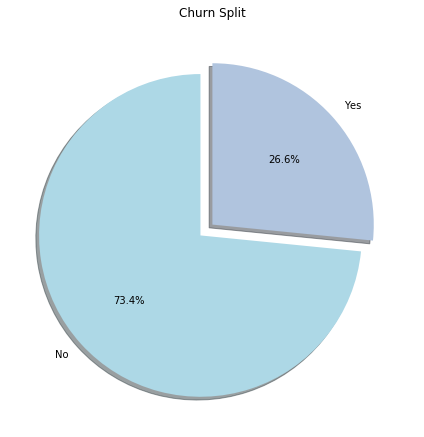

In [40]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

labels, values = zip(*Counter(df["Churn"]).items())
colors = ['lightblue', 'lightsteelblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()

fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow=True, colors=colors)
plt.tight_layout()
plt.title("Churn Split")
plt.show()

In [41]:
def get_class_counts(df, target, display='all', subtitle=None):
    """
    Plots a countplot of column.

    display are number percent or all

    """

    fig = plt.figure(figsize=(7,7))
    g = sns.countplot(df[target])
    for p in g.patches:
        if display == 'all':
            g.annotate('{}\n\n{:.2f} %\n'.format(p.get_height(),100*p.get_height()/len(df)),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        elif display == 'number':
            g.annotate('{}'.format(p.get_height()),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        elif display == 'percent':
            g.annotate('{:.2f}'.format(100*p.get_height()/len(df)),(p.get_x(),p.get_height()+10),bbox=dict(boxstyle="round",alpha=0.1,color='grey'))
        else:
            raise ValueError('dispay must be either if number, percent or all')

    g.set_ylim(0, max([p.get_height()*1.15 for p in g.patches]))
    g.text(x=0.5, y=1.07, s=f'count plot of {target}', fontsize=16, weight='bold', ha='center', va='bottom', transform = g.transAxes, color='navy')

    if subtitle:
        g.text(x=0.5, y=0.5, s=f'{subtitle}', fontsize=12, alpha=0.75, ha='center', va='bottom', transform = g.transAxes, color='darkblue')
    if any([p.get_height()/len(df) < 0.26 for p in g.patches]):
        fig.text(x=1, y=0.5, s=f'Imbalance exists in data', bbox=dict(boxstyle='round', color='red', alpha=0.7), color='white', fontsize=14)
    else:
        fig.text(x=1, y=0.5, s=f'Balance dataset', bbox=dict(boxstyle='round', color='green', alpha=0.7), color='white', fontsize=14)

    plt.show()

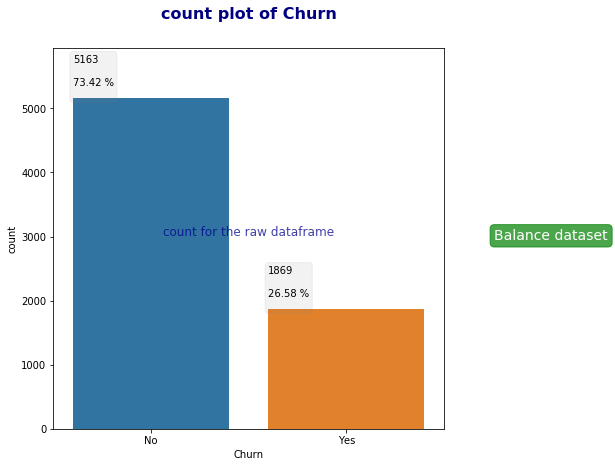

In [42]:
get_class_counts(df, 'Churn', subtitle='count for the raw dataframe')

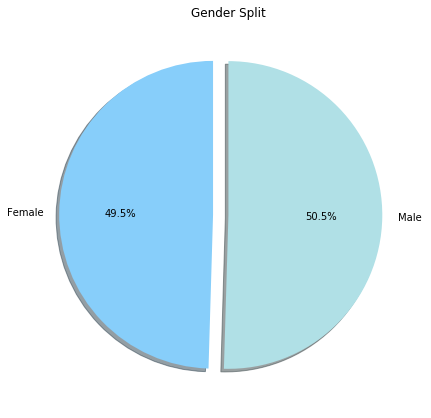

In [43]:
labels, values = zip(*Counter(df["gender"]).items())
colors = ['lightskyblue', 'powderblue']
piechart_df = (pd.DataFrame(list(values),list(labels)))
piechart_df = piechart_df.reset_index()
piechart_df
fig = plt.figure(figsize=[6, 6])

plt.pie(piechart_df[0],labels=piechart_df["index"],startangle=90,explode=(0.1,0),autopct="%1.1f%%", shadow = True, colors=colors)
plt.tight_layout()
plt.title("Gender Split")
plt.show()

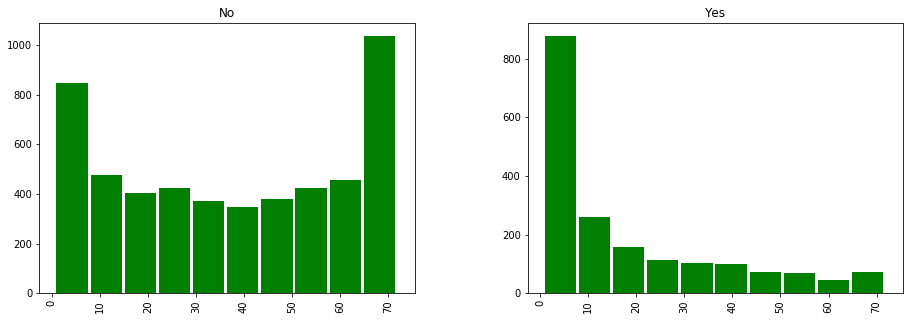

In [44]:
fig=df['tenure'].hist(by=df['Churn'],figsize=(15,5),width=6.5, color='green' )
plt.show()

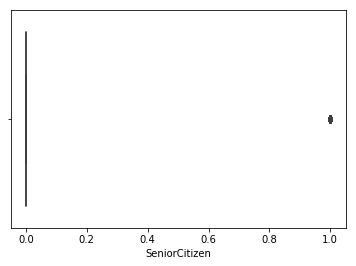

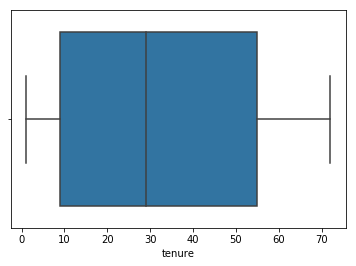

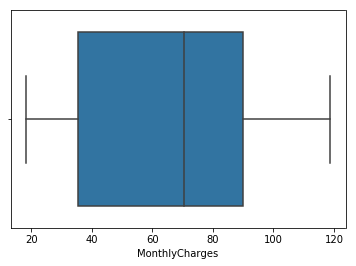

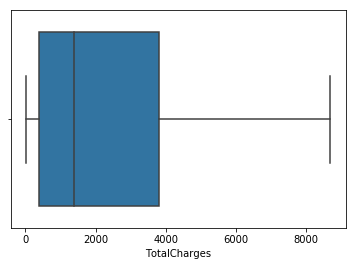

In [45]:
# Boxplot for numerical column
import matplotlib.pyplot as plt
import seaborn as sns
for c in num_cols:
    plt.figure()
    sns.boxplot(x=df[c])

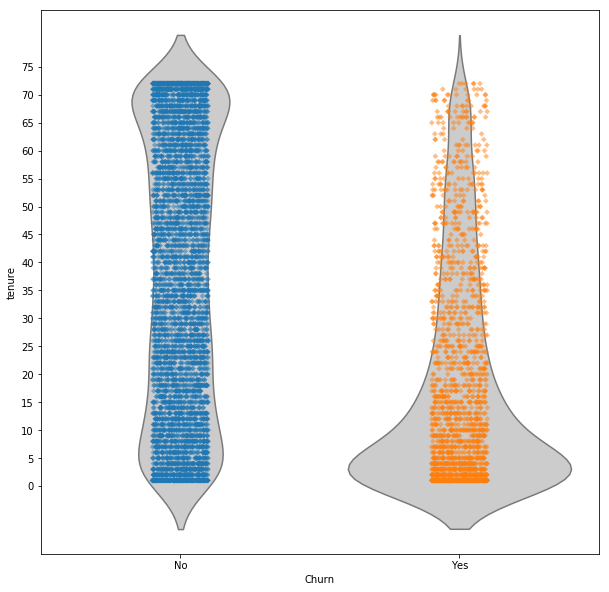

In [46]:
plt.subplots(figsize=(10,10))

g = sns.violinplot(x="Churn", y="tenure", data=df, inner=None,color="0.8")
g = sns.stripplot(x="Churn", y="tenure", data=df, jitter=True, marker="D", size=4, alpha=0.5,edgecolor="gray")

g.set_yticks(np.arange(0,80,5))
g

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
#transforming the data

df = df.apply(LabelEncoder().fit_transform)
df = df.drop('customerID',axis=1)
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,497,3624,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,435,536,1


In [49]:
df.corr(method="pearson")

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.00,-0.00,-0.00,0.01,0.01,-0.01,-0.01,-0.00,-0.01,-0.01,0.00,-0.01,-0.01,-0.01,0.00,-0.01,0.02,-0.01,-0.00,-0.01
SeniorCitizen,-0.00,1.00,0.02,-0.21,0.02,0.01,0.15,-0.03,-0.13,-0.01,-0.02,-0.15,0.03,0.05,-0.14,0.16,-0.04,0.22,0.11,0.15
Partner,-0.00,0.02,1.00,0.45,0.38,0.02,0.14,0.00,0.15,0.15,0.17,0.13,0.14,0.13,0.29,-0.01,-0.16,0.11,0.34,-0.15
Dependents,0.01,-0.21,0.45,1.00,0.16,-0.00,-0.02,0.04,0.15,0.09,0.08,0.13,0.05,0.02,0.24,-0.11,-0.04,-0.11,0.08,-0.16
tenure,0.01,0.02,0.38,0.16,1.00,0.01,0.34,-0.03,0.33,0.37,0.37,0.32,0.29,0.30,0.68,0.00,-0.37,0.27,0.87,-0.35
PhoneService,-0.01,0.01,0.02,-0.00,0.01,1.00,-0.02,0.39,-0.01,0.02,0.00,-0.02,0.06,0.04,0.00,0.02,-0.01,0.27,0.09,0.01
MultipleLines,-0.01,0.15,0.14,-0.02,0.34,-0.02,1.00,-0.11,0.01,0.12,0.12,0.01,0.18,0.18,0.11,0.17,-0.18,0.45,0.46,0.04
InternetService,-0.00,-0.03,0.00,0.04,-0.03,0.39,-0.11,1.00,-0.03,0.04,0.05,-0.03,0.11,0.10,0.10,-0.14,0.08,-0.24,-0.21,-0.05
OnlineSecurity,-0.01,-0.13,0.15,0.15,0.33,-0.01,0.01,-0.03,1.00,0.18,0.18,0.28,0.04,0.06,0.37,-0.16,-0.10,-0.04,0.25,-0.29
OnlineBackup,-0.01,-0.01,0.15,0.09,0.37,0.02,0.12,0.04,0.18,1.00,0.19,0.20,0.15,0.14,0.28,-0.01,-0.13,0.14,0.35,-0.20


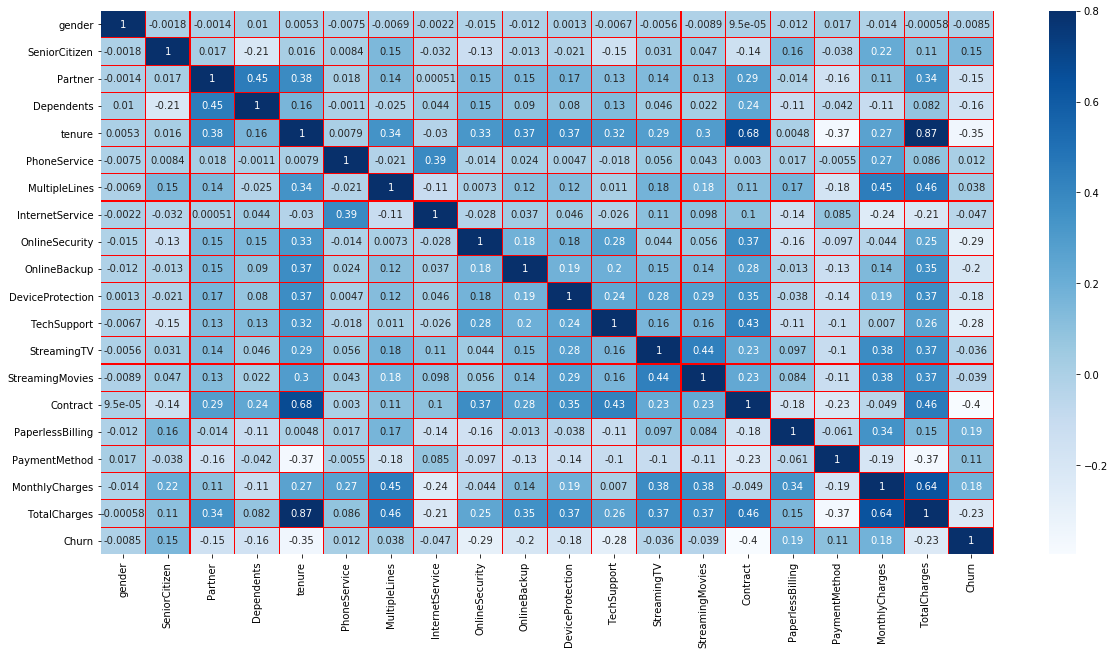

In [50]:
# Correlation Plot
corrmat = df.corr()

#Set up the matplolib figure
f, ax = plt.subplots(figsize=(20, 10))

#Draw the heatmap using seaborn
colormap = plt.cm.Blues
sns.heatmap(corrmat, linewidths=0.1, cmap = colormap, linecolor = 'Red', vmax=0.8, annot=True)


# Data Preprocessing, Feature Selection & Feature Importance:

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

In [53]:
#Splitting the data into features & target

X = df.iloc[:,:-2]
y = df[["Churn"]]


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=0,stratify=y)
#scaling the data

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)


In [56]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000)
rfc.fit(X_train_std,y_train)
importances = rfc.feature_importances_

f_importances = pd.Series(importances, df.columns[:-2])
f_importances.sort_values(ascending=False, inplace=True)
f_importances

MonthlyCharges     0.23
tenure             0.23
Contract           0.09
PaymentMethod      0.06
TechSupport        0.05
OnlineSecurity     0.05
gender             0.03
OnlineBackup       0.03
PaperlessBilling   0.03
Partner            0.03
DeviceProtection   0.03
MultipleLines      0.03
InternetService    0.03
SeniorCitizen      0.03
Dependents         0.02
StreamingMovies    0.02
StreamingTV        0.02
PhoneService       0.01
dtype: float64

Optimal number of features : 16


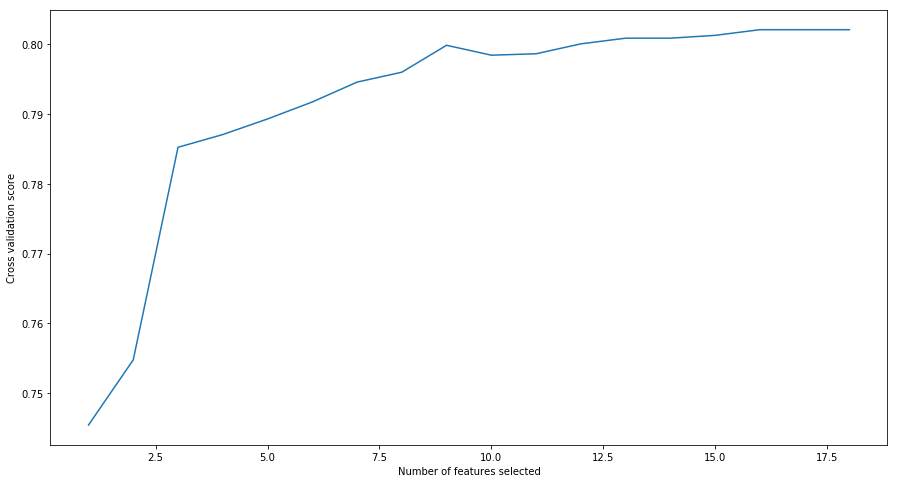

In [57]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)

selector = RFECV(estimator=lr, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
selector.fit(X_train_std, y_train)

print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(15,8))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

# Model Building & Comparison

# Model 1 - Logistic Regression

In [58]:
lr = LogisticRegression(penalty="l1",C=.1,random_state=0)
lr.fit(X_train_std,y_train)

y_pred_lr = lr.predict(X_test_std)

train_acc_log = round((lr.score(X_train_std, y_train))*100,1)
test_acc_log = round((lr.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_log)
print('Test accuracy: %s %%' % test_acc_log)

Training accuracy: 80.5 %
Test accuracy: 80.7 %


In [60]:
from ggplot import*

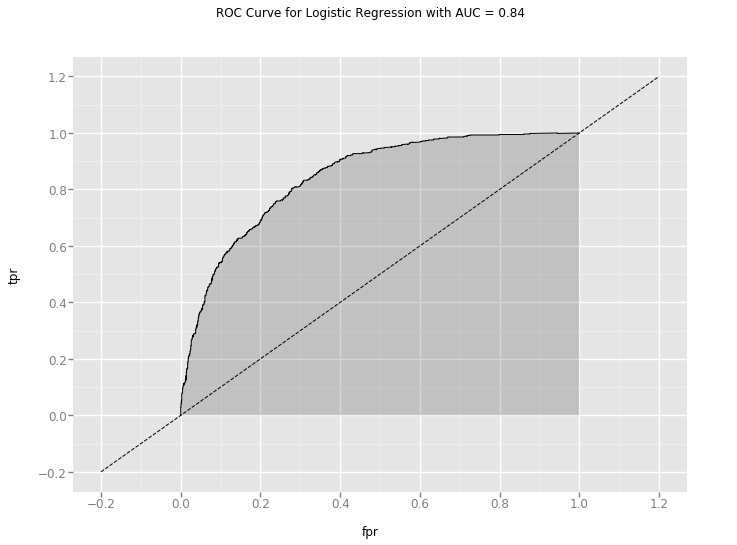

<ggplot: (157004042332)>

In [61]:
from sklearn.metrics import roc_curve

preds = lr.predict_proba(X_test_std)[:,1]
fpr_lr, tpr_lr, thresholds = metrics.roc_curve(y_test, preds)
roc_data = pd.DataFrame(dict(fpr=fpr_lr,tpr=tpr_lr))
auc_lr = round(metrics.auc(fpr_lr,tpr_lr),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Logistic Regression with AUC = %s" % str(auc_lr))

In [62]:
X_arr = X.values
y_arr = y.values.flatten()

from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics, model_selection

predicted = model_selection.cross_val_predict(LogisticRegression(), X_arr, y_arr, cv=10)

lr_cv_score = round(metrics.accuracy_score(y_arr, predicted)*100,1)

print("Logistic Regression score after using Cross Validation (k=10) is : %s %%"% lr_cv_score)

Logistic Regression score after using Cross Validation (k=10) is : 80.5 %


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



Text(0.5, 1.0, 'Logistic Regression')

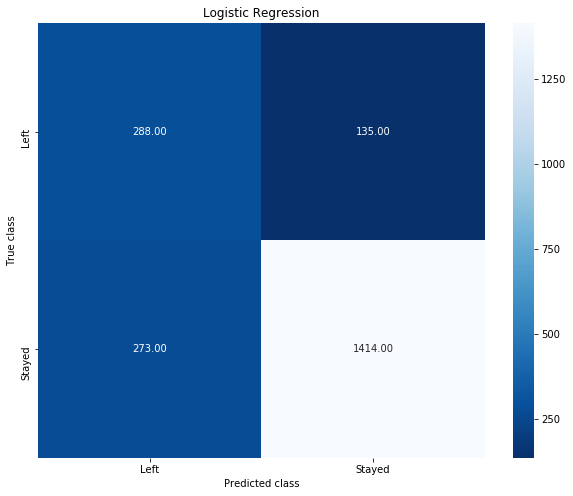

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_lr))

##Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logit_cm = metrics.confusion_matrix(y_pred_lr, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(logit_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

# Conclusions - Logistic Regression

# Model 2 - Random Forest Classifier

In [64]:
rfc = RandomForestClassifier(random_state=0,n_estimators=1000,criterion="gini")

rfc.fit(X_train_std,y_train)

y_pred_rfc = rfc.predict(X_test_std)

train_acc_rfc = round((rfc.score(X_train_std, y_train))*100,1)
test_acc_rfc = round((rfc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_rfc)
print('Test accuracy: %s %%' % test_acc_rfc)

Training accuracy: 99.7 %
Test accuracy: 79.0 %


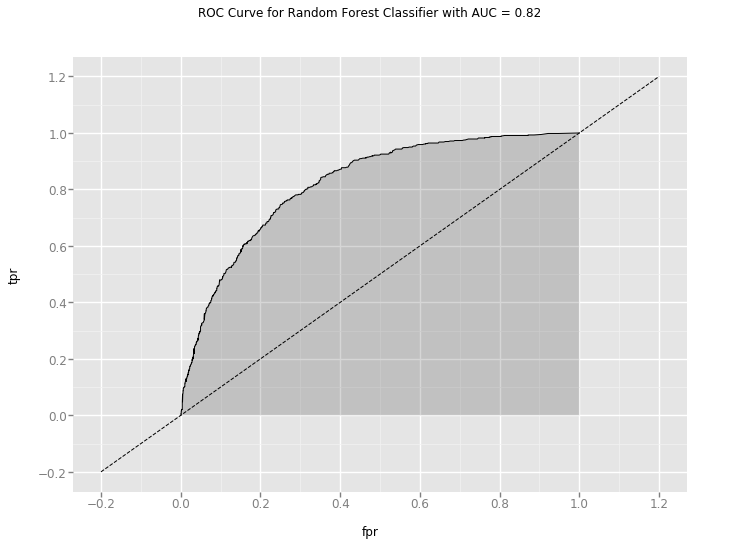

<ggplot: (157004106679)>

In [65]:
# from sklearn.metrics import roc_curve
# #!pip install ggplot
# from ggplot import *

preds = rfc.predict_proba(X_test_std)[:,1]
fpr_rfc, tpr_rfc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_rfc,tpr=tpr_rfc))

auc_rfc = round(metrics.auc(fpr_rfc,tpr_rfc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Random Forest Classifier with AUC = %s" % str(auc_rfc))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.78      0.79      0.78      2110



Text(0.5, 1.0, 'RFC')

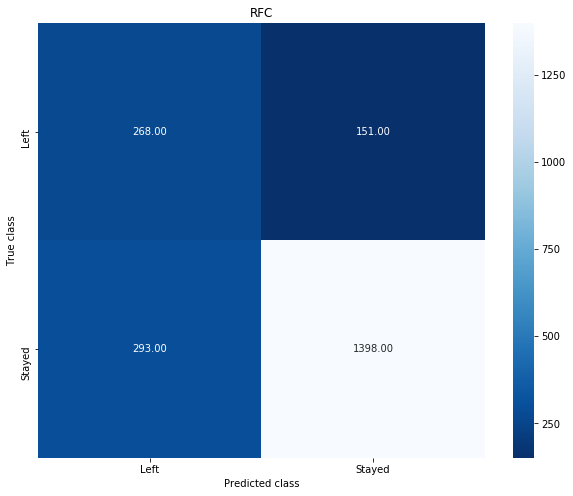

In [66]:
print(classification_report(y_test, y_pred_rfc))

##Confusion matrix

rfc_cm = metrics.confusion_matrix(y_pred_rfc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(rfc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('RFC')

# Conclusions - Random Forest Classifier

# Model 3 - Decision Tree Classifier

In [67]:
from sklearn import tree

dtc = tree.DecisionTreeClassifier(random_state=0)

dtc.fit(X_train_std,y_train)

y_pred_dtc = dtc.predict(X_test_std)

train_acc_dtc = round((dtc.score(X_train_std, y_train))*100,1)
test_acc_dtc = round((dtc.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_dtc)
print('Test accuracy: %s %%' % test_acc_dtc)

Training accuracy: 99.7 %
Test accuracy: 71.6 %


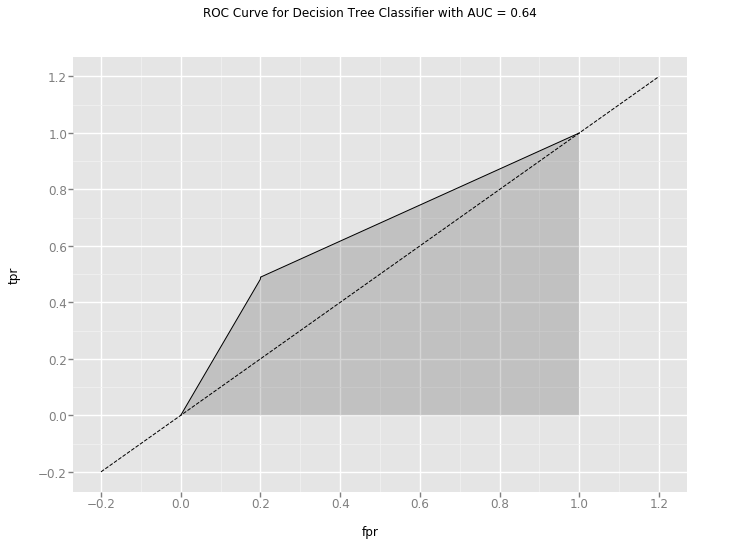

<ggplot: (-9223371879850414192)>

In [68]:
preds = dtc.predict_proba(X_test_std)[:,1]

fpr_dtc, tpr_dtc, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_dtc,tpr=tpr_dtc))

auc_dtc = round(metrics.auc(fpr_dtc,tpr_dtc),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Decision Tree Classifier with AUC = %s" % str(auc_dtc))

In [69]:
X_arr = X.values
y_arr = y.values.flatten()

predicted = model_selection.cross_val_score(tree.DecisionTreeClassifier(), X_arr, y_arr, cv=10)

dtc_cv_score = round(np.mean(predicted)*100,1)

print("Decision Tree Classifier score after using Cross Validation (k=10) is : %s %%" % dtc_cv_score)

Decision Tree Classifier score after using Cross Validation (k=10) is : 72.7 %


              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1549
           1       0.47      0.48      0.47       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110



Text(0.5, 1.0, 'Decision Tree Classifier')

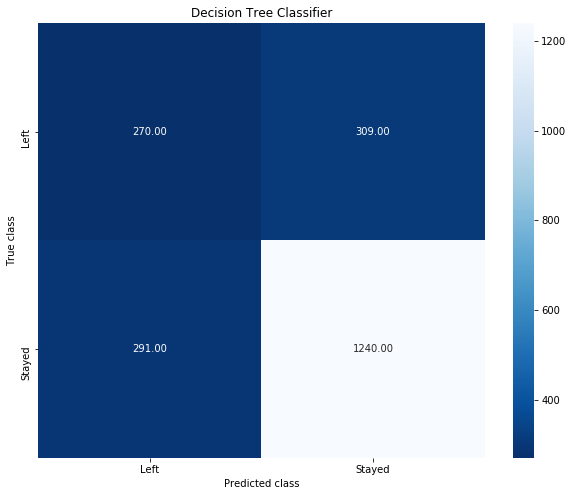

In [70]:
print(classification_report(y_test, y_pred_dtc))

##Confusion matrix

dtc_cm = metrics.confusion_matrix(y_pred_dtc, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(dtc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"],cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classifier')

# Conclusions - Decision Tree Classifier

# Model 4 - k Nearest Neighbors Classifier (kNN)

In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_std,y_train)

y_pred_knn = knn.predict(X_test_std)

train_acc_knn = round((knn.score(X_train_std, y_train))*100,1)
test_acc_knn = round((knn.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn)
print('Test accuracy: %s %%' % test_acc_knn)

Training accuracy: 85.9 %
Test accuracy: 73.3 %


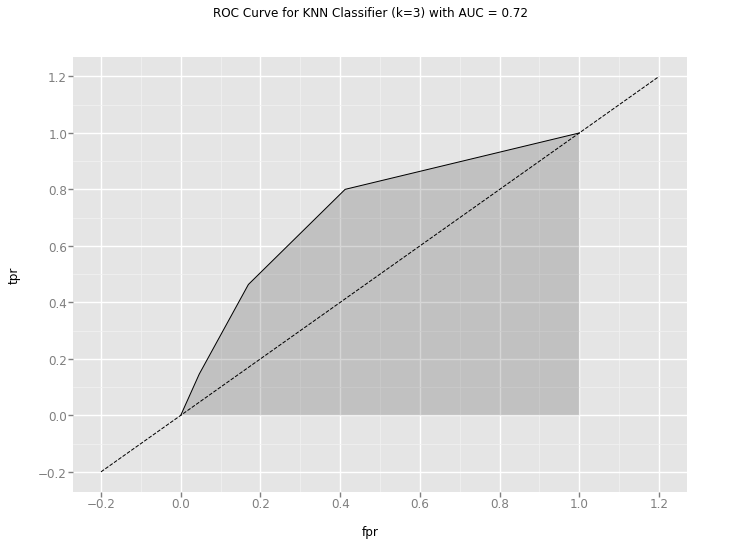

<ggplot: (157004618879)>

In [72]:
preds = knn.predict_proba(X_test_std)[:,1]

fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_knn,tpr=tpr_knn))

auc_knn = round(metrics.auc(fpr_knn,tpr_knn),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for KNN Classifier (k=3) with AUC = %s" % str(auc_knn))

In [73]:
myList = list(range(0,50))

# subsetting just the odd ones
neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
knn_cv_score = []

# perform 10-fold cross validation
for k in neighbors:
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score.append(scores.mean())
    
knn_cv_score = np.asarray(knn_cv_score)
#knn_cv_score.mean()
knn_cv_score = round(np.mean(predicted)*100,1)

print("kNN score after using Cross Validation (k=10) is : %s %%"% knn_cv_score)

kNN score after using Cross Validation (k=10) is : 72.7 %


              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1549
           1       0.50      0.46      0.48       561

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110



Text(0.5, 1.0, 'kNN')

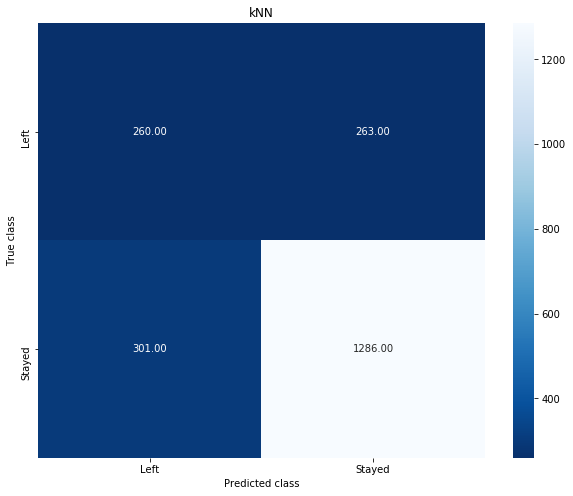

In [74]:
print(classification_report(y_test, y_pred_knn))

##Confusion matrix

knn_cm = metrics.confusion_matrix(y_pred_knn, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('kNN')

In [75]:
myList = list(range(0,50))

neighbors = filter(lambda x: x % 2 != 0, myList)

knn_cv_score_opt = []

# empty list that will hold cv scores
neighbors = [i for i in myList if myList[i]%2!=0]

# perform 10-fold cross validation
for k in neighbors:
    knn_opt = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_opt, X_train, y_train, cv=10, scoring='accuracy')
    knn_cv_score_opt.append(scores.mean())
    

The optimal number of neighbors is : 27


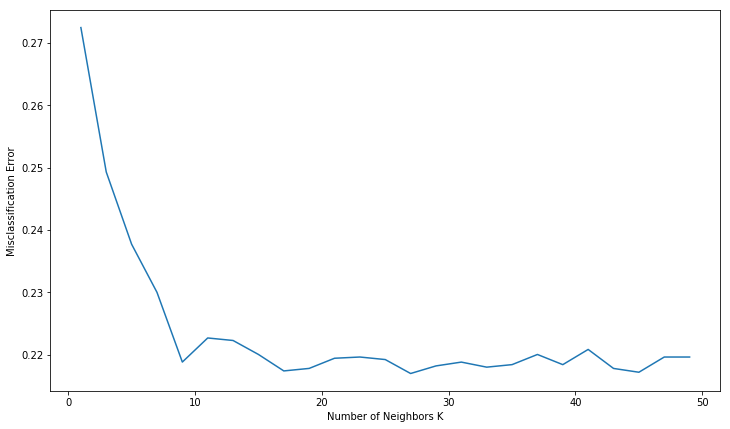

In [76]:
MSE = [1 - x for x in knn_cv_score_opt]

optimal_k = neighbors[MSE.index(min(MSE))]

knn_cv_score_opt = round(np.mean(knn_cv_score_opt)*100,1)

print ("The optimal number of neighbors is :",optimal_k)

#plot misclassification error vs k
plt.figure(figsize=(12,7))
plt.plot(neighbors, MSE)
#plt.yticks(np.arange(0,0.3,.5))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [77]:
from sklearn.neighbors import KNeighborsClassifier

knn_opt = KNeighborsClassifier(n_neighbors = optimal_k)

knn_opt.fit(X_train_std,y_train)

y_pred_knn_opt = knn_opt.predict(X_test_std)

train_acc_knn_opt = round((knn_opt.score(X_train_std, y_train))*100,1)

test_acc_knn_opt = round((knn_opt.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_knn_opt)
print('Test accuracy: %s %%' % test_acc_knn_opt)

Training accuracy: 79.6 %
Test accuracy: 76.5 %


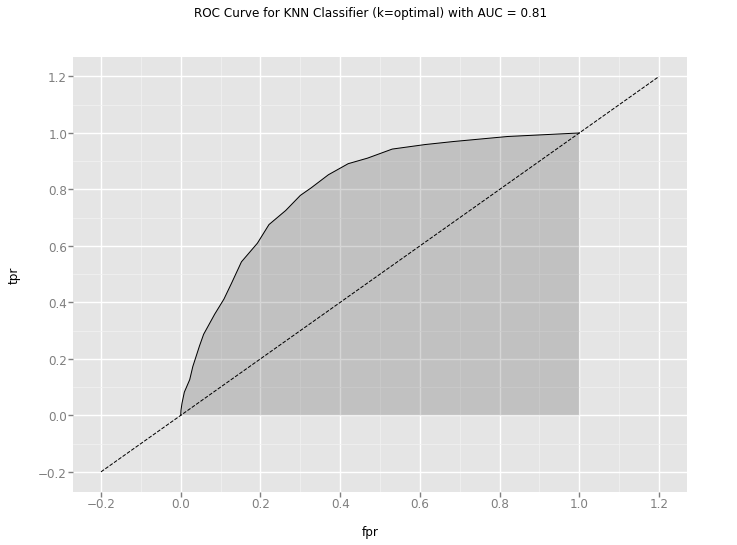

<ggplot: (157005609164)>

In [78]:
preds_opt = knn_opt.predict_proba(X_test_std)[:,1]

fpr_knn_opt, tpr_knn_opt, thresholds_opt = metrics.roc_curve(y_test, preds_opt)
#tpr_knn_opt
roc_data_opt = pd.DataFrame(dict(fpr=fpr_knn_opt,tpr=tpr_knn_opt))

auc_knn_opt = round(metrics.auc(fpr_knn_opt,tpr_knn_opt),2)

ggplot(roc_data_opt,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for KNN Classifier (k=optimal) with AUC = %s" % str(auc_knn_opt))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1549
           1       0.50      0.46      0.48       561

    accuracy                           0.73      2110
   macro avg       0.65      0.65      0.65      2110
weighted avg       0.73      0.73      0.73      2110

              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1549
           1       0.57      0.47      0.51       561

    accuracy                           0.76      2110
   macro avg       0.69      0.67      0.68      2110
weighted avg       0.75      0.76      0.76      2110



Text(0.5, 51.0, 'Predicted class')

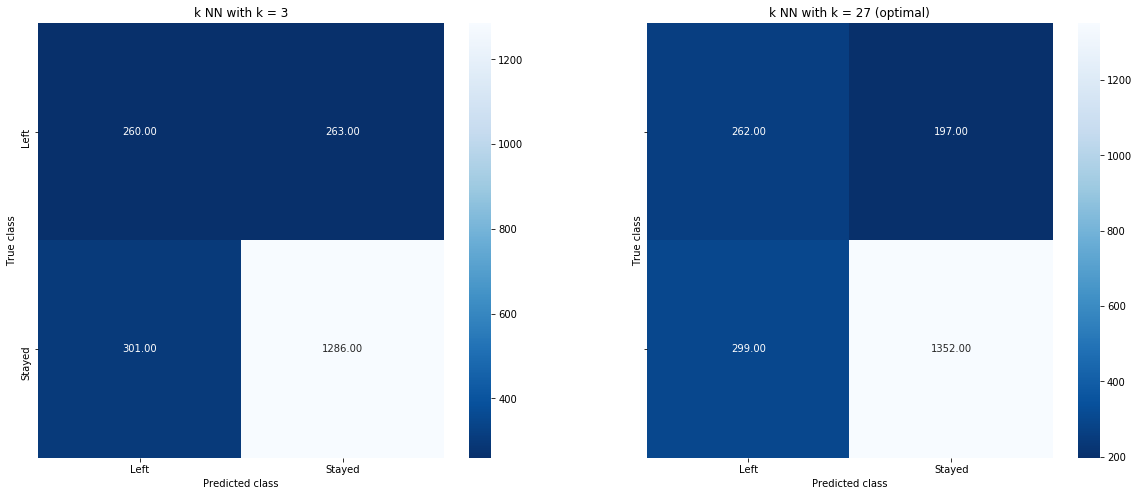

In [79]:
print(classification_report(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn_opt))


##Confusion matrix
knn_cm_opt = metrics.confusion_matrix(y_pred_knn_opt, y_test, [1,0])

a=['Deltaic Plains','Hummock and Swale']

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize = (20,8))

sns.heatmap(knn_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"],yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r,ax=ax1)
ax1.set_title("k NN with k = 3")
ax1.set_ylabel('True class')
ax1.set_xlabel('Predicted class')


sns.heatmap(knn_cm_opt, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r, ax=ax2)
ax2.set_title("k NN with k = 27 (optimal)")
ax2.set_ylabel('True class')
ax2.set_xlabel('Predicted class')


# Conclusions - k Nearest Neighbors Classifier (kNN)

# Model 5 - Gaussian Naive-Bayes Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()

gaussian.fit(X_train_std, y_train)

y_pred_gauss = gaussian.predict(X_test_std)

train_acc_gauss = round((gaussian.score(X_train_std, y_train))*100,1)
test_acc_gauss = round((gaussian.score(X_test_std, y_test))*100,1)

print("Training accuracy: %s %%" % train_acc_gauss)
print('Test accuracy: %s %%' % test_acc_gauss)

Training accuracy: 75.6 %
Test accuracy: 75.9 %


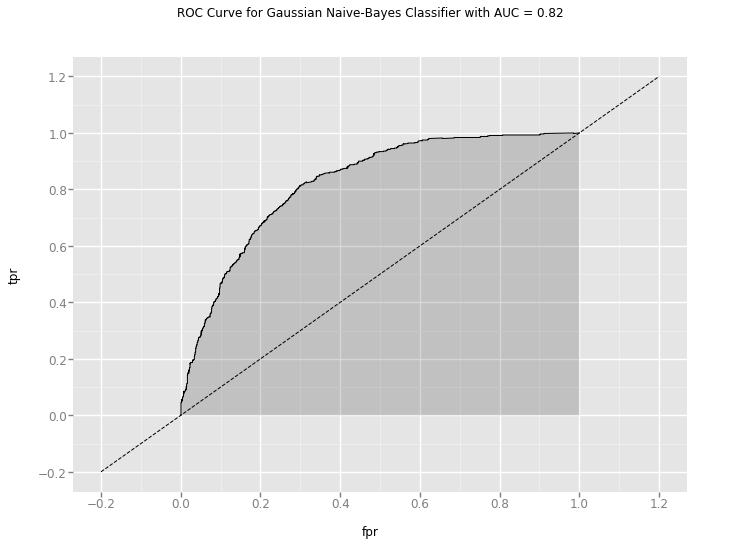

<ggplot: (-9223371879849084037)>

In [81]:
# from sklearn.metrics import roc_curve
# #!pip install ggplot
# from ggplot import *

preds = gaussian.predict_proba(X_test_std)[:,1]
fpr_nb, tpr_nb, thresholds = metrics.roc_curve(y_test, preds)

roc_data = pd.DataFrame(dict(fpr=fpr_nb,tpr=tpr_nb))

auc_gaussian = round(metrics.auc(fpr_nb,tpr_nb),2)

ggplot(roc_data,aes(x="fpr",y="tpr"))+geom_line()+geom_abline(linetype='dashed')+geom_area(alpha=.2)+ggtitle("ROC Curve for Gaussian Naive-Bayes Classifier with AUC = %s" % str(auc_gaussian))

In [82]:
predicted = model_selection.cross_val_score(GaussianNB(),X_arr,y_arr,cv=10)

nb_cv_score = round(np.mean(predicted)*100,1)

print("Naive Bayes score after using Cross Validation (k=10) is : %s %%"% nb_cv_score)

Naive Bayes score after using Cross Validation (k=10) is : 75.6 %


              precision    recall  f1-score   support

           0       0.88      0.78      0.83      1549
           1       0.54      0.71      0.61       561

    accuracy                           0.76      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.76      0.77      2110



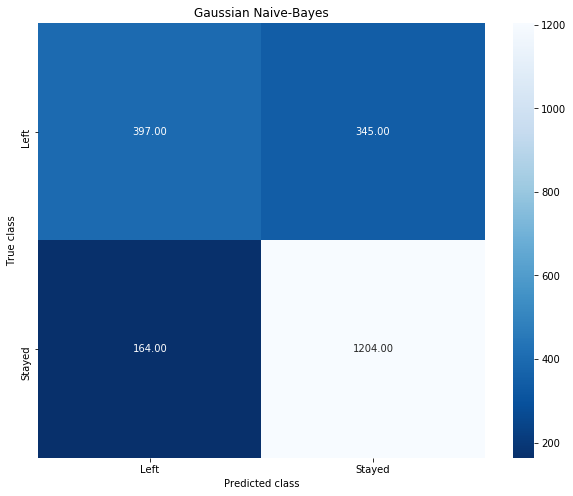

In [83]:
print(classification_report(y_test, y_pred_gauss))

##Confusion matrix

gauss_cm = metrics.confusion_matrix(y_pred_gauss, y_test, [1,0])

plt.figure(figsize=(10,8))
sns.heatmap(gauss_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] ,cmap = plt.cm.Blues_r)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Gaussian Naive-Bayes')
plt.show()

# Conclusions - Gaussian Naive-Bayes Classifier

# Model Comparison

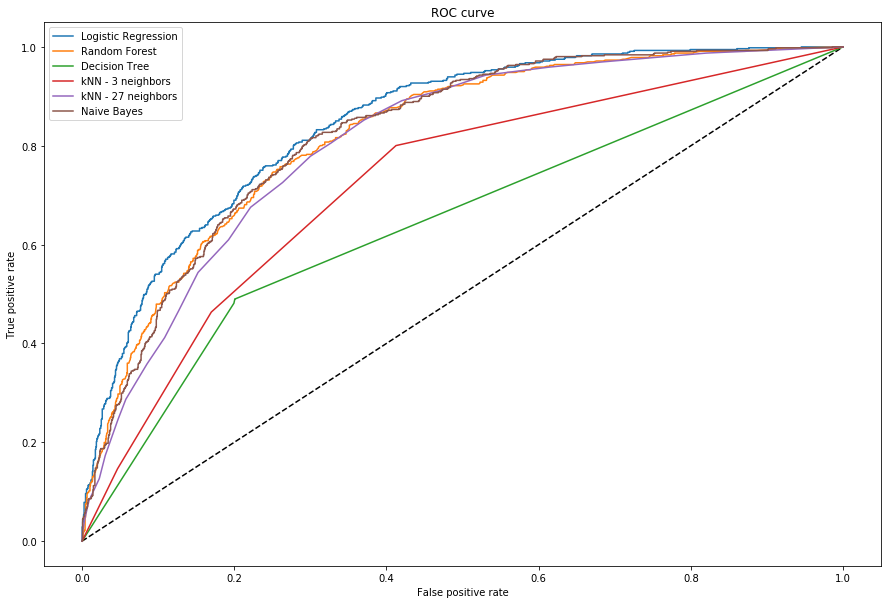

In [84]:
plt.figure(figsize=(15, 10))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest')
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree')
plt.plot(fpr_knn, tpr_knn, label='kNN - 3 neighbors')
plt.plot(fpr_knn_opt, tpr_knn_opt, label='kNN - 27 neighbors')
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [85]:
summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier', 'k NN (k=3)', 'k NN (k=27)', 
              'Gaussian Naive-Bayes'],
    'Testing Score': [test_acc_log , test_acc_rfc, test_acc_dtc, test_acc_knn,test_acc_knn_opt,test_acc_gauss],
    'k Fold Cross Validations (k=10)': [lr_cv_score ,"0", dtc_cv_score, knn_cv_score, knn_cv_score_opt, nb_cv_score],
    'AUC': [auc_lr,auc_rfc,auc_dtc,auc_knn,auc_knn_opt,auc_gaussian]
})

summary[['Testing Score','k Fold Cross Validations (k=10)']] = summary[['Testing Score','k Fold Cross Validations (k=10)']].astype(str) + '%'
summary.iloc[1,3] = "NA"

summary = summary.sort_values(by='Testing Score', ascending=False).reset_index(drop=True).reindex(range(len(summary)))
summary=summary[['Model','Testing Score','k Fold Cross Validations (k=10)', 'AUC']]

summary

,Model,Testing Score,k Fold Cross Validations (k=10),AUC
0,Logistic Regression,80.7%,80.5%,0.84
1,Random Forest Classifier,79.0%,0%,NA
2,k NN (k=27),76.5%,77.6%,0.81
3,Gaussian Naive-Bayes,75.9%,75.6%,0.82
4,k NN (k=3),73.3%,72.7%,0.72
5,Decision Tree Classifier,71.6%,72.7%,0.64


# Closing Remarks

# SUBMITTED BY:SAJIB HALDER(09/10/2019)